# Exercice 1

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

**Pixels of region (1:4, 3:5)**  

In [2]:
lena_array = cv2.imread('../resources/lena.png')
lena_array[1:4, 3:5]

array([[[ 77, 113, 197],
        [ 82, 118, 202]],

       [[ 79, 113, 197],
        [ 75, 109, 193]],

       [[ 78, 114, 198],
        [ 74, 110, 194]]], dtype=uint8)

**Red channel of region (10:15, 25:30)**

In [3]:
region_red = lena_array[10:15, 25:30, 2]
print(region_red)

[[141 129 124 113  98]
 [147 133 116 105 100]
 [148 132 115 106 101]
 [144 130 123 114 102]
 [142 131 125 115 102]]


# Exercice 2

**Channels separation**

In [4]:
blue, green, red = cv2.split(lena_array)

**Image reconstruction from seperate channels**

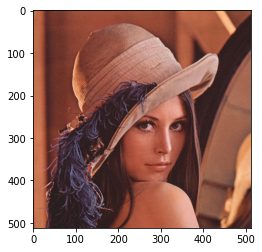

In [5]:
reconstructed = cv2.merge([red, green, blue])
plt.imshow(reconstructed)
plt.show()

**Showing each of separate channels**

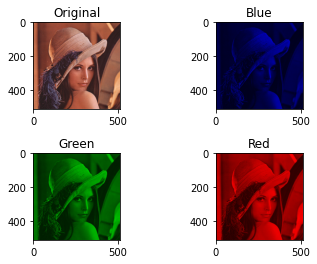

In [6]:
mono_red = np.zeros_like(lena_array)
mono_red[:, :, 0] = red

mono_green = np.zeros_like(lena_array)
mono_green[:, :, 1] = green

mono_blue = np.zeros_like(lena_array)
mono_blue[:, :, 2] = blue

figure, axes = plt.subplots(2, 2)

axes[0][0].set_title('Original')
axes[0][0].imshow(cv2.cvtColor(lena_array, cv2.COLOR_BGR2RGB))

axes[0][1].set_title('Blue')
axes[0][1].imshow(mono_blue)

axes[1][0].set_title('Green')
axes[1][0].imshow(mono_green)

axes[1][1].set_title('Red')
axes[1][1].imshow(mono_red)

plt.subplots_adjust(hspace=.5)
plt.show()

# Exercice 3

**Grey image intensity modification**

- **Method 1**

In [7]:
lena_grey = cv2.imread('../resources/lena.png', cv2.IMREAD_GRAYSCALE)
for i in range(0, 299):
    for j in range(0, 399):
        p = lena_grey[i, j] + 50
        lena_grey[i, j] = 255 if p > 255 else p

- **Method 2**

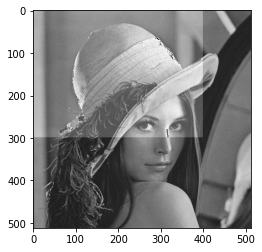

In [8]:
lena_grey = cv2.imread('../resources/lena.png', cv2.IMREAD_GRAYSCALE)
lena_grey[0:299, 0:399] += 50

cv2.imwrite('lena_grey_modified.png', lena_grey)
plt.imshow(lena_grey, cmap='gray')
plt.show()

**RGB image intensity modification**

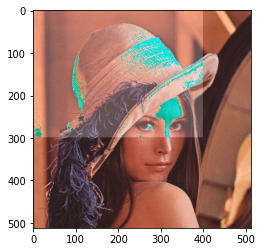

In [9]:
lena_rgb = cv2.imread('../resources/lena.png')

lena_rgb[0:299, 0:399] += 50

cv2.imwrite('lena_rgb_modified.png', lena_rgb)
plt.imshow(cv2.cvtColor(lena_rgb, cv2.COLOR_BGR2RGB))
plt.show()

# Exercice 4

**Histogram of RGB image**

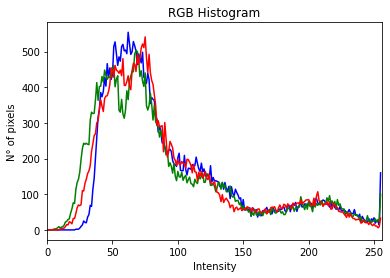

In [10]:
image_test = cv2.imread('../resources/ImageTest.jpg')

blue, green, red = cv2.split(image_test)

plt.figure()	
plt.title('RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('N° of pixels')
plt.xlim([0, 256])

hist_b = cv2.calcHist([blue], [0], None, [256], [0, 256])
plt.plot(hist_b, color='b')

hist_g = cv2.calcHist([green], [0], None, [256], [0, 256])
plt.plot(hist_g, color='g')

hist_r = cv2.calcHist([red], [0], None, [256], [0, 256])
plt.plot(hist_r, color='r')

plt.show()

**Histogram of Greyscale image**

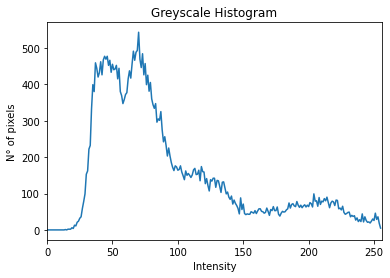

In [11]:
image_grey = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)

hist_grey = cv2.calcHist([image_grey], [0], None, [256], [0, 256])

plt.figure()
plt.title('Greyscale Histogram')
plt.xlabel('Intensity')
plt.ylabel('N° of pixels')
plt.xlim([0, 256])
plt.plot(hist_grey)
plt.show()

**Equalization of greyscale histogram**

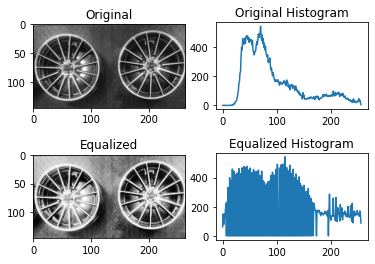

In [12]:
equalized_grey = cv2.equalizeHist(image_grey)

figure, axes = plt.subplots(2, 2)

axes[0][0].set_title('Original')
axes[0][0].imshow(image_grey, cmap='gray')
axes[0][1].set_title('Original Histogram')
axes[0][1].plot(hist_grey)

axes[1][0].set_title('Equalized')
axes[1][0].imshow(equalized_grey, cmap='gray')
axes[1][1].set_title('Equalized Histogram')
axes[1][1].plot(cv2.calcHist([equalized_grey], [0], None, [256], [0, 256]))

plt.subplots_adjust(hspace=.5)
plt.show()

cv2.imwrite('equalized_grey.jpg', equalized_grey)
figure.savefig('equalization_grey.png', dpi=200)


**Equalization of RGB histogram**

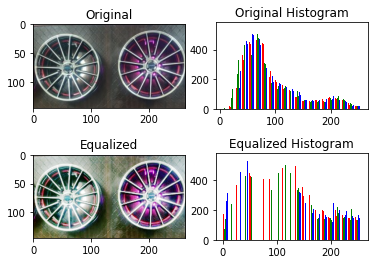

In [13]:
equalized_blue = cv2.equalizeHist(blue)
equalized_green = cv2.equalizeHist(green)
equalized_red = cv2.equalizeHist(red)

equalized_rgb = cv2.merge([equalized_red, equalized_green, equalized_blue])

figure, axes = plt.subplots(2, 2)
axes[0][0].set_title('Original')
axes[0][0].imshow(cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB))
axes[0][1].set_title('Original Histogram')
axes[0][1].hist([blue.ravel(), green.ravel(), red.ravel()], 256, color=('b', 'g', 'r'))

axes[1][0].set_title('Equalized')
axes[1][0].imshow(equalized_rgb)
axes[1][1].set_title('Equalized Histogram')
axes[1][1].hist(
    [
        equalized_blue.ravel(), 
        equalized_green.ravel(), 
        equalized_red.ravel()
    ], 
    256, 
    color=('b', 'g', 'r')
)

plt.subplots_adjust(hspace=.5)
plt.show()

cv2.imwrite('equalized_rgb.jpg', equalized_rgb)
figure.savefig('equalization_rgb.png', dpi=200)
